In [1]:
import tensorflow as tf

keras = tf.keras

tf.__version__

'2.5.0'

In [365]:
import pandas as pd

train = pd.read_csv('./input/competitive-data-science-predict-future-sales/sales_train.csv')
print(len(train))
train.head()

2935849


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [24]:
train[155030:155040]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
155030,25.02.2013,1,23,4128,899.0,1.0
155031,26.02.2013,1,23,4128,899.0,1.0
155032,16.02.2013,1,23,4147,2090.0,1.0
155033,19.02.2013,1,23,4147,2090.0,1.0
155034,03.02.2013,1,23,4148,1490.0,1.0
155035,07.02.2013,1,23,4148,1490.0,1.0
155036,17.02.2013,1,23,4148,1490.0,1.0
155037,04.02.2013,1,23,4161,849.0,1.0
155038,05.02.2013,1,23,4161,849.0,1.0
155039,06.02.2013,1,23,4161,849.0,2.0


In [55]:
test = pd.read_csv('./input/competitive-data-science-predict-future-sales/test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
sample_submission = pd.read_csv('./input/competitive-data-science-predict-future-sales/sample_submission.csv')
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [362]:
items = pd.read_csv('./input/competitive-data-science-predict-future-sales/items.csv')
num_items = len(items)
print(f'Number of items: {num_items}')
items.head()

Number of items: 22170


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [377]:
arr = list(map(lambda id: train[train.item_id == id].shop_id.nunique(), range(10))) # len(items)
max(arr)

54

In [379]:
print(train[train.shop_id == 5].item_id.nunique())
print(train[train.item_id == 5037].shop_id.nunique())

7084
50


In [359]:
item_categories = pd.read_csv('./input/competitive-data-science-predict-future-sales/item_categories.csv')
print(len(item_categories))
item_categories.head()

84


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [360]:
# items[items.item_id == 0]
print(len(items[items.item_category_id == 0]))
list(map(lambda id: len(items[items.item_category_id == id]), range(len(item_categories))))[:5]
max(list(map(lambda id: len(items[items.item_category_id == id]), range(len(item_categories)))))
# def get_related_items_by_category():

4


5035

In [72]:
shops = pd.read_csv('./input/competitive-data-science-predict-future-sales/shops.csv')
# shops.head()
num_shops = len(shops)
print(f'Number of shops: {num_shops}')

Number of shops: 60


In [58]:
A = train.copy()
A.pop('date')
A.pop('item_price')
print(A.columns)
A = A.groupby(['date_block_num', 'shop_id', 'item_id']).sum() #.item_cnt_day.agg('sum')
A = A.reset_index()
A.head()

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_day'], dtype='object')


,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [59]:
train[(train.date_block_num == 0) & (train.shop_id == 0) & (train.item_id == 32)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
40085,03.01.2013,0,0,32,221.0,2.0
40086,21.01.2013,0,0,32,221.0,2.0
40087,25.01.2013,0,0,32,221.0,1.0
40088,31.01.2013,0,0,32,221.0,1.0


In [60]:
A[75150:75155]

,date_block_num,shop_id,item_id,item_cnt_day
75150,1,13,6004,1.0
75151,1,13,6005,1.0
75152,1,13,6013,1.0
75153,1,13,6031,1.0
75154,1,13,6045,4.0


In [61]:
train[(train.date_block_num == 1) & (train.shop_id == 13) & (train.item_id == 6045)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
149057,04.02.2013,1,13,6045,190.0,1.0
149058,11.02.2013,1,13,6045,190.0,1.0
149059,20.02.2013,1,13,6045,190.0,1.0
149060,23.02.2013,1,13,6045,190.0,1.0


In [62]:
len(A)

1609124

In [76]:
print(train.date_block_num.nunique())
num_date_block_num = 34
assert num_date_block_num == train.date_block_num.nunique()
train.tail()

34


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [79]:
import numpy as np
series = []
series.append([1, 2, 3])
series.append([2, [3, 2]])
series

[[1, 2, 3], [2, [3, 2]]]

In [80]:
num_shops_bak = num_shops
num_items_bak = num_items
num_date_block_num_bak = num_date_block_num
num_shops_bak, num_items_bak, num_date_block_num_bak

(60, 22170)

In [ ]:
i, k, m = 1, 13, 6045
len(A[(A.date_block_num == i) & (A.shop_id == k) & (A.item_id == m)].item_cnt_day)

In [ ]:
# 1. Baseline
# for each store
#   for each item
#     (time, item) one-dimentional forecasting 
#

# 2.
# For each item
#    (time, [store1-item, store2-item, ...]) forecasting

# 3.
# For each item
#    (time, [store1-item, store2-item, ..., mean_price-item-across-stores-monthly]) forecasting

# 4.
# Add category?

# 5.
# Across items?

In [334]:
num_date_block_num_used = 34
shops = [0, 1, 25]
items = [6045, 7460, 32]

num_shops = len(shops)
num_items = len(items)

series = np.zeros((num_date_block_num_used, num_shops * num_items))

print(series.shape)

B = A[(A.shop_id.isin(shops)) & (A.item_id.isin(items)) & (A.date_block_num < num_date_block_num_used)]

for index, row in B.iterrows():
    shop_pos = shops.index(int(row.shop_id))
    item_pos = items.index(int(row.item_id))
    feature_pos = shop_pos * num_items + item_pos
    series[int(row.date_block_num), feature_pos] = row.item_cnt_day

(34, 9)


In [344]:
items = [6045]
A[A.item_id.isin(items)].shop_id.unique()

array([ 0,  1,  4,  6,  7,  8, 12, 13, 14, 15, 18, 19, 21, 23, 25, 26, 27,
       28, 29, 30, 31, 35, 42, 43, 45, 50, 51, 52, 53, 54, 56, 59,  3,  5,
       16, 24, 32, 38, 44, 46, 10, 41, 57, 58, 37, 47, 17, 22, 49, 39,  2,
       33, 48])

In [485]:
# total_num_sold, target_item_sold 
#
series = np.zeros((num_date_block_num_used, 3))

target_shop_id = 5
target_item_id = 5037 # 6045

C = A[(A.shop_id == target_shop_id)]
C = C.groupby(['date_block_num', 'shop_id']).item_cnt_day.agg('sum').reset_index() # A[(A.shop_id == target_shop) & (A.date_block_num == 1)].item_cnt_day.sum()
for index, row in C.iterrows():
    # print(row.iloc[-1])
    series[int(row.date_block_num), 0] = row.iloc[-1]
    
D = A[(A.item_id == target_item_id)]
D = D.groupby(['date_block_num']).item_cnt_day.agg('sum').reset_index()
D.head()
for index, row in D.iterrows():
    series[int(row.date_block_num), 1] = row.iloc[-1]
    
E = A[(A.shop_id == target_shop_id) & (A.item_id == target_item_id)]
for index, row in E.iterrows():
    series[int(row.date_block_num), -1] = row.item_cnt_day    

pd.DataFrame(series).head(34)
# A[(A.shop_id == target_shop_id) & (A.item_id == target_item_id)]

,0,1,2
0,0.0,0.0,0.0
1,877.0,0.0,0.0
2,1355.0,0.0,0.0
3,1008.0,0.0,0.0
4,1110.0,0.0,0.0
5,1393.0,0.0,0.0
6,1265.0,0.0,0.0
7,1510.0,0.0,0.0
8,1298.0,0.0,0.0
9,1267.0,0.0,0.0


In [486]:
print(series.shape)
# series
series[0]

(34, 3)


array([0., 0., 0.])

<AxesSubplot:>

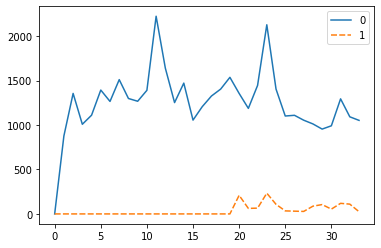

In [487]:
import seaborn as sns

df = pd.DataFrame(series[:, :2])

sns.lineplot(data = df)

In [488]:
def seq2seq_window_dataset_inner(series, window_size = 7):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift = 1, drop_remainder = True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.map(lambda w: (w[:-1], w[1:,-1]))
    return ds
    
def seq2seq_window_dataset(series, batch_size = 3, shuffle_buffer = 1000):
    ds = seq2seq_window_dataset_inner(series)
    ds = ds.shuffle(shuffle_buffer)
    return ds.batch(batch_size).prefetch(1)
    
def seq2seq_window_dataset_x_only(series, batch_size = 3, shuffle_buffer = 1000):
    ds = seq2seq_window_dataset_inner(series)
    ds = ds.map(lambda x, y: x)
    return ds.batch(batch_size).prefetch(1)

for X, y in seq2seq_window_dataset(series, 15):
    print(X.shape)
    print(y.shape)
    break
    
for X in seq2seq_window_dataset_x_only(series, 15):
    print(X.shape)
    break

(15, 7, 3)
(15, 7)
(15, 7, 3)


# CNN

In [489]:
def build_model(series, window_size = 7, batch_size = 3):
    split = int(len(series) * 0.7)
    train = series[:split]
    valid = series[split:]
    
    input_shape = train.shape[1]
    print(input_shape)
    
    assert window_size < len(train)
    assert window_size < len(valid)
    
    keras.backend.clear_session()
    tf.random.set_seed(1)
    np.random.seed(1)
    
    train_set = seq2seq_window_dataset(train)
    valid_set = seq2seq_window_dataset(valid)
    
    early_stopping = keras.callbacks.EarlyStopping(
        patience = 10,
        restore_best_weights = True,
    )

    model = keras.models.Sequential([
        keras.layers.InputLayer(input_shape = [None, input_shape]),
        # keras.layers.BatchNormalization(),
    ])

    for dilation_rate in (1, 2, 4, 8):
        model.add(keras.layers.Conv1D(
            filters = 32,
            kernel_size = 2,
            strides = 1,
            dilation_rate = dilation_rate,
            padding = 'causal',
            activation = 'relu',
        ))
    
    model.add(keras.layers.Dense(1))
    return model, train_set, valid_set
    
model, train_set, valid_set = build_model(series)
model.summary()

3
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          224       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
dense (Dense)                (None, None, 1)           33        
Total params: 6,497
Trainable params: 6,497
Non-trainable params: 0
_________________________________________________________________


In [490]:
train_set.element_spec

(TensorSpec(shape=(None, None, 3), dtype=tf.float64, name=None),
 TensorSpec(shape=(None, None), dtype=tf.float64, name=None))

In [491]:
def fit_model(model, train_set, valid_set):
    model.compile(
        optimizer = 'adam',
        loss = 'huber',
        metrics = ['mae'],
    )

    history = model.fit(
        train_set,
        epochs = 500,
        validation_data = valid_set,
        callbacks = [early_stopping],
    )
    return history
    
history = fit_model(model, train_set, valid_set)


Epoch 1/500
6/6 [==============================] - 1s 47ms/step - loss: 26.0975 - mae: 26.5930 - val_loss: 13.9992 - val_mae: 14.4992
Epoch 2/500
6/6 [==============================] - 0s 8ms/step - loss: 8.9294 - mae: 9.4148 - val_loss: 9.3272 - val_mae: 9.7926
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 6.2467 - mae: 6.7186 - val_loss: 5.4208 - val_mae: 5.9045
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 3.7252 - mae: 4.1810 - val_loss: 3.7483 - val_mae: 4.2056
Epoch 5/500
6/6 [==============================] - 0s 8ms/step - loss: 2.5963 - mae: 3.0568 - val_loss: 2.4875 - val_mae: 2.9530
Epoch 6/500
6/6 [==============================] - 0s 7ms/step - loss: 2.0272 - mae: 2.4623 - val_loss: 1.5254 - val_mae: 1.9824
Epoch 7/500
6/6 [==============================] - 0s 7ms/step - loss: 1.8502 - mae: 2.3099 - val_loss: 1.6680 - val_mae: 2.0699
Epoch 8/500
6/6 [==============================] - 0s 7ms/step - loss: 1.5102 - mae: 1.9063 

Validation MAE min: 1.3141286373138428


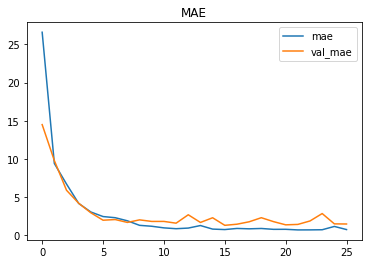

In [492]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['mae', 'val_mae']].plot(title = 'MAE')
print(f'Validation MAE min: {history_df.val_mae.min()}')

(27, 7, 1)
1.317666600699778


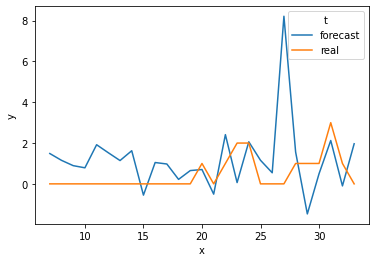

In [493]:
import seaborn as sns

def model_forecast(model, series):    
    ds = seq2seq_window_dataset_x_only(series)
    cnn_forecast = model.predict(ds)

    pos = -1
    print(cnn_forecast.shape)
    f = cnn_forecast[:,-1,-1]
    s = series[window_size:,pos] # this should be window_size - 1 ...

    T1 = pd.DataFrame({
        'x': list(range(window_size, window_size + len(f))),
        'y': f,
        't': 'forecast',
    })
    T2 = pd.DataFrame({
        'x': list(range(window_size, window_size + len(f))),
        'y': s,
        't': 'real',
    })
    T3 = pd.DataFrame({
        'x': list(range(window_size, window_size + len(f))),
        'y': series[window_size:,-2],
        't': 'all',
    })
    
    # df = pd.concat([T1, T2, T3])
    df = pd.concat([T1, T2])

    sns.lineplot(data = df, x = 'x', y = 'y', hue = 't')
    print(keras.metrics.mean_absolute_error(f, s).numpy())
    
model_forecast(model, series)    

In [455]:
series[7:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 2.,
       2., 0., 0., 0., 1., 1., 1., 3., 1., 0.])

In [250]:
print(series.shape)
cnn_forecast.shape

(34, 9)


(28, 7, 9)

<AxesSubplot:>

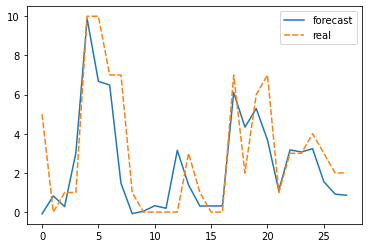

In [272]:
import seaborn as sns

pos = 6
f = cnn_forecast[:,-1,pos]
s = series[window_size-1:,pos]
df = pd.DataFrame({
    'forecast': f,   
    'real': s,
})

sns.lineplot(data = df)

In [258]:
cnn_forecast[:,-1,:].shape
cnn_forecast[:,-1,0].shape
# tf.squeeze(cnn_forecast[:,-1,:][:0].shape).shape
# tf.squeeze(cnn_forecast[:,-1,:], axis = -1).numpy().shape

(28,)

In [273]:
series[window_size-1:].shape

(28, 9)

In [ ]:
def predict_last_feature(df, shops, items):
    num_shops = len(shops)
    num_items = len(items)
    
    series = np.zeros(34, num_shops * num_items)
    used_df = df[(df.shop_id.isin(shops)) & (df.item_id.isin(items))]
    for _, row in used_df.iterrows():
        shop_pos = shops.index(int(row.shop_id))
        item_pos = items.index(int(row.item_id))
        feature_pos = shop_pos * num_items + item_pos
        series[int(row.date_block_num), feature_pos] = row.item_cnt_day
        
    split = int(len(series) * 0.7)    
    train = series[:split]
    valid = series[split:]
    
    tf.random.set_seed(1)
    np.random.seed(1)

    input_shape = train.shape[1]
    window_size = 7
    batch_size = 3
    
    train_set = seq2seq_window_dataset(train, window_size, batch_size)
    valid_set = seq2seq_window_dataset(valid, window_size, batch_size)

    early_stopping = keras.callbacks.EarlyStopping(
        patience = 10,
        restore_best_weights = True,
    )

    model = keras.models.Sequential([
        keras.layers.InputLayer(input_shape = [None, input_shape]),
    ])
    for dilation_rate in (1, 2, 4, 8):
    model.add(keras.layers.Conv1D(
        filters = 32,
        kernel_size = 2,
        strides = 1,
        dilation_rate = dilation_rate,
        padding = 'causal',
        activation = 'relu',
    ))
    
    model.add(keras.layers.Dense(input_shape))
    
    

In [430]:
list(range(2, 3+3))

[2, 3, 4, 5]

# Reference

[UD187 - Intro to TensorFlow for Deep Learning - Lesson 8 Time Series Forcasting - 29. Wavenet](https://classroom.udacity.com/courses/ud187)